In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


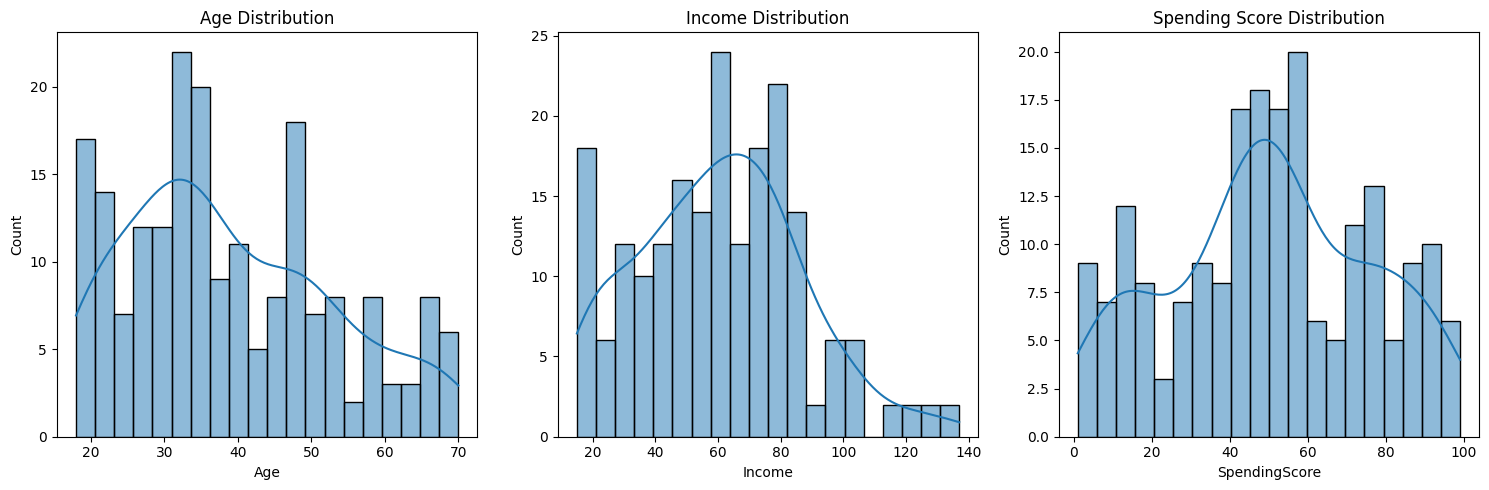

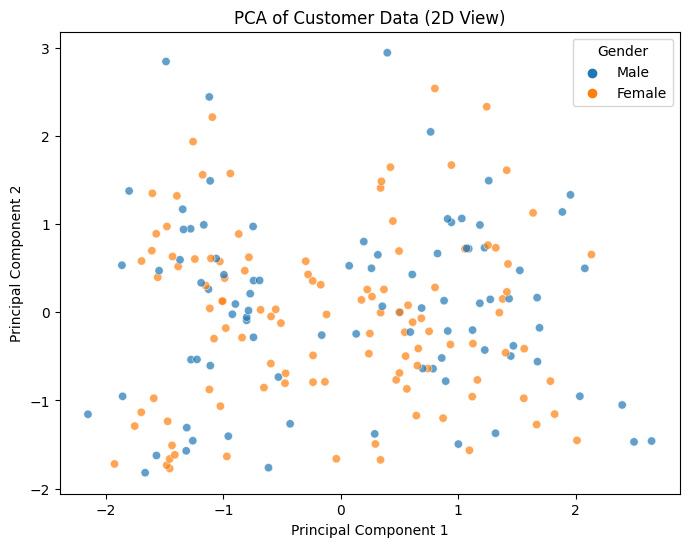

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
print(data.head())
print("\nDataset info:")
print(data.info())

# Rename columns for convenience
data = data.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
})

# Visualize the raw data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Income'], bins=20, kde=True)
plt.title('Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['SpendingScore'], bins=20, kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

# Optional PCA for 2D view
# Select features for clustering (excluding CustomerID)
X = data[['Age', 'Income', 'SpendingScore']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_data = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_data = pd.concat([pca_data, data[['Gender']]], axis=1)

# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Gender', data=pca_data, alpha=0.7)
plt.title('PCA of Customer Data (2D View)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Gender')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


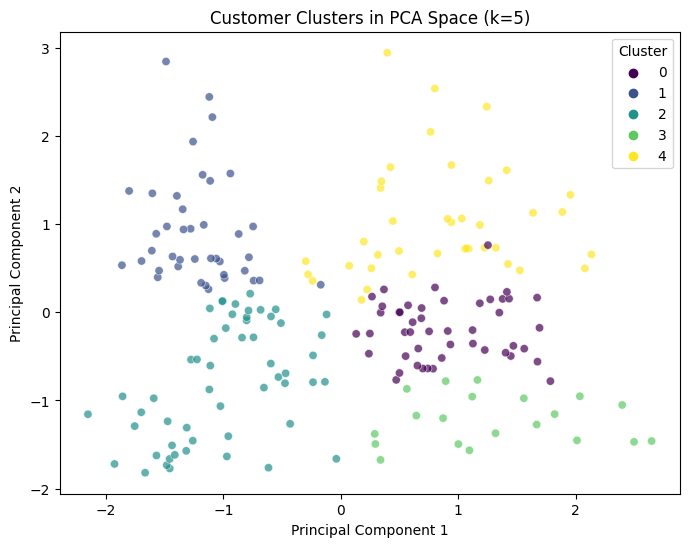

In [3]:
from sklearn.cluster import KMeans

# We'll start with an arbitrary k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels
data['Cluster'] = kmeans.labels_

# Visualize clusters in PCA space
pca_data['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_data, palette='viridis', alpha=0.7)
plt.title('Customer Clusters in PCA Space (k=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

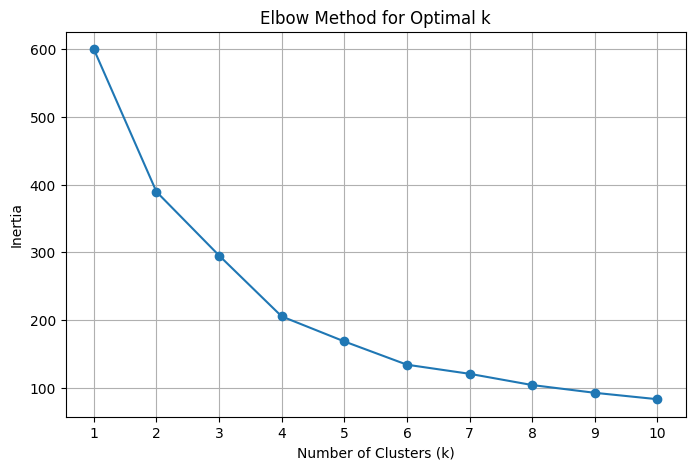

In [4]:
# Calculate inertia for different k values
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


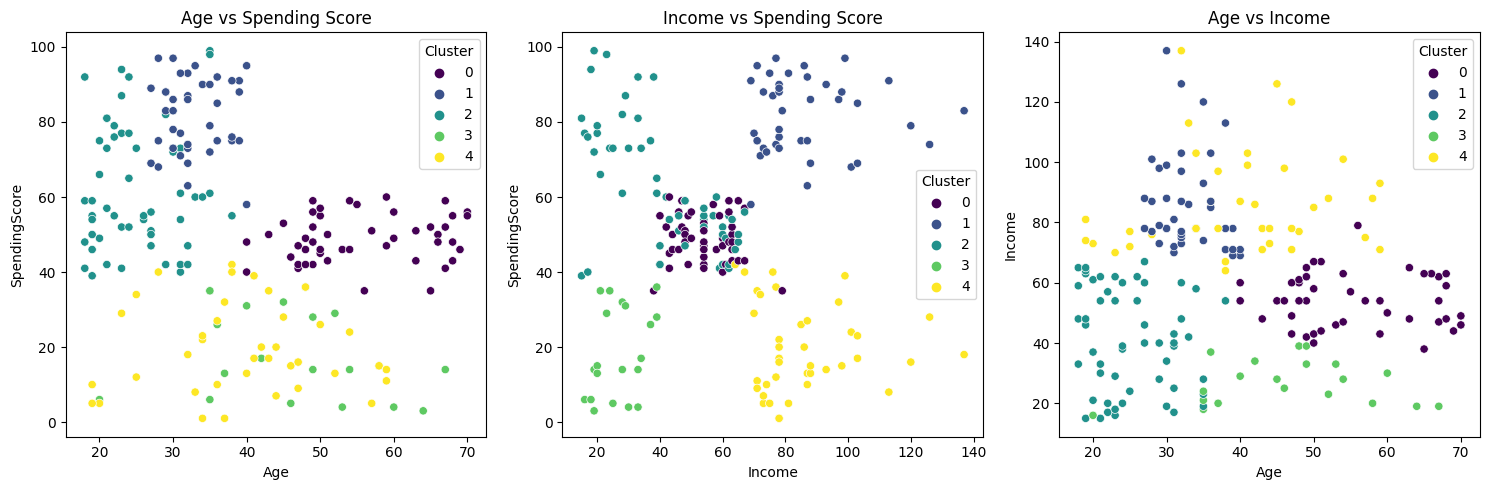

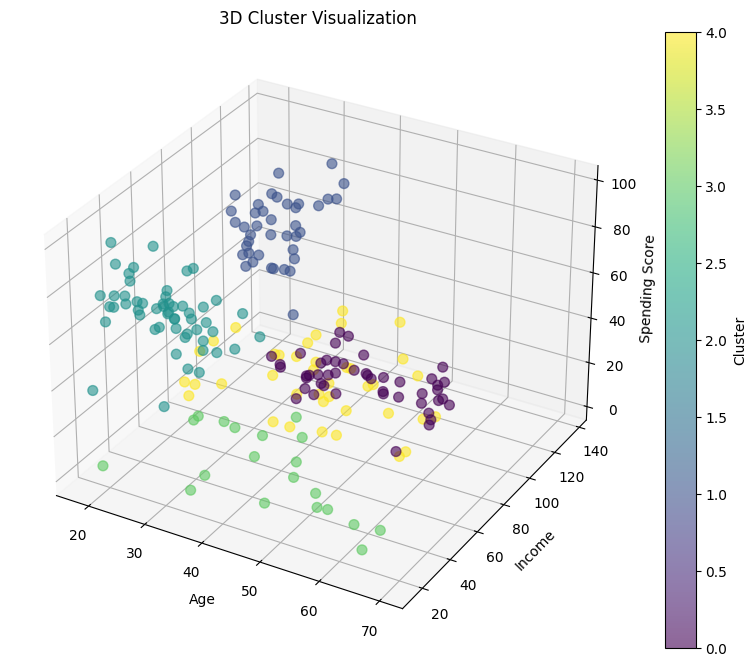

In [5]:
# Let's assume optimal k=5 based on the elbow method
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_

# Visualize clusters in original feature space
plt.figure(figsize=(15, 5))

# Age vs Spending Score
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='SpendingScore', hue='Cluster', data=data, palette='viridis')
plt.title('Age vs Spending Score')

# Income vs Spending Score
plt.subplot(1, 3, 2)
sns.scatterplot(x='Income', y='SpendingScore', hue='Cluster', data=data, palette='viridis')
plt.title('Income vs Spending Score')

# Age vs Income
plt.subplot(1, 3, 3)
sns.scatterplot(x='Age', y='Income', hue='Cluster', data=data, palette='viridis')
plt.title('Age vs Income')

plt.tight_layout()
plt.show()

# 3D visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['Age'], data['Income'], data['SpendingScore'], 
                     c=data['Cluster'], cmap='viridis', s=50, alpha=0.6)

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score')
ax.set_title('3D Cluster Visualization')

plt.colorbar(scatter, label='Cluster')
plt.show()

Silhouette Score for k=5: 0.417
For k=2, Silhouette Score: 0.335
For k=3, Silhouette Score: 0.358
For k=4, Silhouette Score: 0.404
For k=5, Silhouette Score: 0.417
For k=6, Silhouette Score: 0.428
For k=7, Silhouette Score: 0.411
For k=8, Silhouette Score: 0.408


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

For k=9, Silhouette Score: 0.420
For k=10, Silhouette Score: 0.423


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


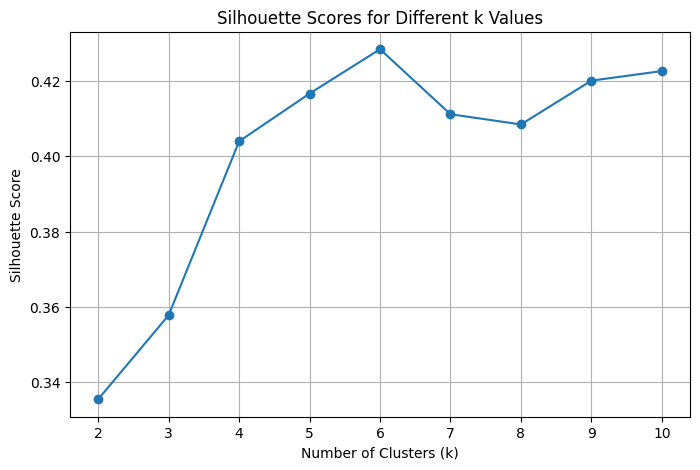


Cluster Profiles:
               Age     Income  SpendingScore
Cluster                                     
0        55.638298  54.382979      48.851064
1        32.875000  86.100000      81.525000
2        25.185185  41.092593      62.240741
3        46.250000  26.750000      18.350000
4        39.871795  86.102564      19.358974


In [6]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for our chosen k=5
silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg:.3f}")

# Calculate silhouette scores for different k values to validate our choice
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k={k}, Silhouette Score: {silhouette_avg:.3f}")

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k Values')
plt.xticks(k_values)
plt.grid()
plt.show()

# Interpret the clusters
cluster_profiles = data.groupby('Cluster')[['Age', 'Income', 'SpendingScore']].mean()
print("\nCluster Profiles:")
print(cluster_profiles)

The mean values for each cluster help interpret what each group represents:

Cluster 0: Might be middle-aged customers with average income and spending

Cluster 1: Could be younger customers with high spending

Cluster 2: Might be older customers with lower spending

Cluster 3: Could be high-income customers who spend moderately

Cluster 4: Might be high-income customers who spend a lot

This analysis helps the mall understand different customer segments for targeted marketing strategies.

New chat